In [2]:
#scale the data
#initialize centroids
#label each data point
#plot the centroids
#repeat 3-5 until centroids stops changing

In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output
#import in neede libraries

In [12]:
chasis = pd.read_csv('/home/jle_linux/Desktop/TDMprivate/data/1ee938a2-f172-11ee-baa6-fb353e7798cd/_apollo_canbus_chassis/1ee938a2-f172-11ee-baa6-fb353e7798cd_apollo_canbus_chassis.csv')

In [13]:
best = pd.read_csv('/home/jle_linux/Desktop/TDMprivate/data/1ee938a2-f172-11ee-baa6-fb353e7798cd/_apollo_sensor_gnss_best_pose/1ee938a2-f172-11ee-baa6-fb353e7798cd_apollo_sensor_gnss_best_pose.csv')

In [14]:
import CalculatedFieldSubroutines as cfa

In [16]:
best= best.sort_values( 'time' )

In [18]:
chasis = chasis.sort_values('time')

In [22]:
cfa.BinaryDrivingMode(chasis)

In [23]:
cfa.TernaryDrivingModeTransition(chasis)

In [25]:
cfa.ChassisBestPoseMatchedTime(chasis, best)

In [30]:
chasis.head()

,brakePercentage,groupMetadataID,drivingMode,speedMps,time,throttlePercentage,steeringPercentage,signal.turnSignal,BinaryDrivingMode,TernaryDrivingModeTransition,ChassisBestPoseMatchedTime
0,0.0,1ee938a2-f172-11ee-baa6-fb353e7798cd,EMERGENCY_MODE,17.79,1705608129991874491,25.6,0.0,TURN_NONE,0,0,1705608130063917820
1,0.0,1ee938a2-f172-11ee-baa6-fb353e7798cd,EMERGENCY_MODE,17.80,1705608130023899916,25.6,0.0,TURN_NONE,0,0,1705608130063917820
2,0.0,1ee938a2-f172-11ee-baa6-fb353e7798cd,EMERGENCY_MODE,17.81,1705608130061746121,25.6,0.0,TURN_NONE,0,0,1705608130063917820
3,0.0,1ee938a2-f172-11ee-baa6-fb353e7798cd,EMERGENCY_MODE,17.81,1705608130089918446,25.4,0.0,TURN_NONE,0,0,1705608130063917820
4,0.0,1ee938a2-f172-11ee-baa6-fb353e7798cd,EMERGENCY_MODE,17.82,1705608130121988668,25.4,0.0,TURN_NONE,0,0,1705608130063917820


In [31]:
best.head()
#checked to see the beginning of the data and its variables

,heightMsl,groupMetadataID,latitudeStdDev,longitude,solType,extendedSolutionStatus,time,heightStdDev,solStatus,latitude,longitudeStdDev,numSatsInSolution,ChassisBestPoseMatchedTime
0,208.107897,1ee938a2-f172-11ee-baa6-fb353e7798cd,0.012658,-82.102281,NARROW_INT,33,1705608130063917820,0.022350,SOL_COMPUTED,39.365220,0.008815,26,1705608130063917820
1,208.455640,1ee938a2-f172-11ee-baa6-fb353e7798cd,0.013240,-82.102123,NARROW_INT,33,1705608131065364231,0.024092,SOL_COMPUTED,39.365326,0.009705,25,1705608131065364231
2,208.774862,1ee938a2-f172-11ee-baa6-fb353e7798cd,0.013635,-82.101967,NARROW_INT,33,1705608132075014187,0.025238,SOL_COMPUTED,39.365431,0.010155,23,1705608132075014187
3,209.113884,1ee938a2-f172-11ee-baa6-fb353e7798cd,0.014565,-82.101813,NARROW_INT,33,1705608133064783139,0.027796,SOL_COMPUTED,39.365533,0.009921,24,1705608133064783139
4,209.417217,1ee938a2-f172-11ee-baa6-fb353e7798cd,0.014848,-82.101659,NARROW_INT,33,1705608134070495874,0.028618,SOL_COMPUTED,39.365635,0.009945,24,1705608134070495874


In [43]:
features = ["ChassisBestPoseMatchedTime" , "brakePercentage" , "speedMps" , "throttlePercentage", "steeringPercentage" ]
#created a selection on variables/column that I believed were important and wanted to use

In [44]:
best_pose = chasis.dropna(subset=features)
#deleted any na or missing values, I believe that this dataset had none (would not do this again, since all data is deemed as important)

In [45]:
data = best_pose[features].copy()
#creates a copy of the original data with on the subset features and columns I wanted 

In [33]:
data = cfa.ChassisBestPoseMatchedTime(chasis,best)

In [46]:
data
#show the data

,ChassisBestPoseMatchedTime,brakePercentage,speedMps,throttlePercentage,steeringPercentage
0,1705608130063917820,0.0,17.79,25.6,0.000000
1,1705608130063917820,0.0,17.80,25.6,0.000000
2,1705608130063917820,0.0,17.81,25.6,0.000000
3,1705608130063917820,0.0,17.81,25.4,0.000000
4,1705608130063917820,0.0,17.82,25.4,0.000000
...,...,...,...,...,...
56313,1705609988223658897,12.2,4.53,0.0,39.941235
56314,1705609988223658897,12.2,4.52,0.0,40.607246
56315,1705609988223658897,12.2,4.50,0.0,41.204700
56316,1705609988223658897,12.2,4.49,0.0,41.860920


In [47]:
data = ((data - data.min())/(data.max()-data.min())) * 9 + 1
#minimize the data to be able to ensure no column is prioritized over another.

In [48]:
data.describe()
#you can see that my minimum is now 1 and maximum is now 10

,ChassisBestPoseMatchedTime,brakePercentage,speedMps,throttlePercentage,steeringPercentage
count,56318.000000,56318.000000,56318.000000,56318.000000,56318.000000
mean,5.501826,1.616165,6.933910,2.598088,6.157927
std,2.599567,1.329503,1.918263,1.603198,0.531894
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.252278,1.000000,5.814418,1.000000,6.164693
50%,5.499681,1.000000,6.862477,2.442236,6.229329
75%,7.751934,1.251588,8.556007,3.504348,6.293964
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [49]:
data.head()

,ChassisBestPoseMatchedTime,brakePercentage,speedMps,throttlePercentage,steeringPercentage
0,1.0,1.0,6.919039,3.862112,6.230202
1,1.0,1.0,6.922366,3.862112,6.230202
2,1.0,1.0,6.925693,3.862112,6.230202
3,1.0,1.0,6.925693,3.839752,6.230202
4,1.0,1.0,6.929020,3.839752,6.230202


In [50]:
def random_centroids(data,k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)
#a function that will take in the number of clusters we want with our data
#initialize a list called centroids for i in range k
#then add it to the list of centroids
#the number of centroids is equivalent to the number of clusters we want
#combines all of the centroids(individual pandas series) into a data frame

In [51]:
centroids = random_centroids(data,5)
#we can now run the random_centroids

/tmp/ipykernel_62745/973749533.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [52]:
centroids

,0,1,2,3,4
ChassisBestPoseMatchedTime,1.634657,1.159846,7.205778,7.994050,7.674424
brakePercentage,1.628971,1.000000,1.000000,1.000000,1.000000
speedMps,7.571165,7.617745,9.164880,2.673567,7.241774
throttlePercentage,1.000000,2.196273,1.000000,1.000000,3.124224
steeringPercentage,6.339383,6.598797,5.988257,6.417120,6.390043


In [53]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)
#label each data point 
#finds the euclidean distance between a data point and each cluster for all centroids 
#finding which cluster center is closest to that point 

In [54]:
labels = get_labels(data, centroids)

In [55]:
labels.value_counts()
#how many times each value occurs 

4    21723
1    12479
0     9109
2     7536
3     5471
Name: count, dtype: int64

In [56]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids
#splits the data by each cluster and then calculate a new center for each group

In [57]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()
#Using PCA to change the multidimensional values into 2-D data
#Pass in the several column data and get it converted into 2 column data
#plotting the clusters and coloring from the plotting of centroids 
#will wait and change the graph over the already completed graph 

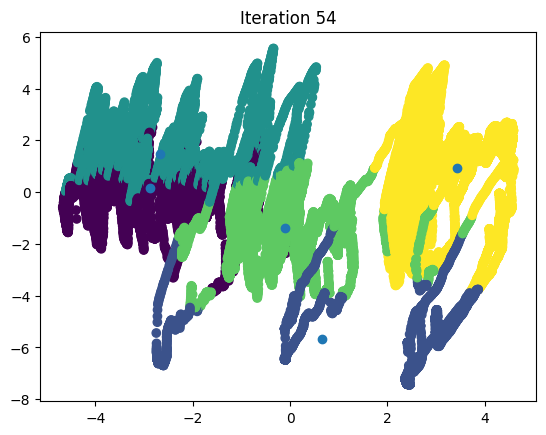

In [58]:
max_iterations = 100
centroid_count = 5

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1
#when new centroids are equilavent to past centroids (indicates that it has stopped shifting)
#update the data to see which label corresponds with each cluster

In [63]:
centroids

,0,1,2,3,4
ChassisBestPoseMatchedTime,2.544436,7.742168,2.648343,5.859884,8.479164
brakePercentage,1.613852,3.112495,1.000000,1.329946,1.240802
speedMps,7.108380,1.769421,6.929568,5.453812,9.005576
throttlePercentage,1.306940,1.208037,3.668370,1.882647,2.590326
steeringPercentage,6.225471,4.694533,6.226626,6.152686,6.225450


In [64]:
labels.value_counts()

3    15547
4    15486
2    11962
0    10540
1     2783
Name: count, dtype: int64

In [65]:
best_pose[labels == 0][["groupMetadataID"] + features]

,groupMetadataID,ChassisBestPoseMatchedTime,brakePercentage,speedMps,throttlePercentage,steeringPercentage
30,1ee938a2-f172-11ee-baa6-fb353e7798cd,1705608131065364231,0.0,18.00,11.9,-0.029383
31,1ee938a2-f172-11ee-baa6-fb353e7798cd,1705608131065364231,0.0,18.00,7.8,-0.029383
32,1ee938a2-f172-11ee-baa6-fb353e7798cd,1705608131065364231,0.0,17.99,0.0,-0.029383
33,1ee938a2-f172-11ee-baa6-fb353e7798cd,1705608131065364231,0.0,17.98,0.0,-0.029383
34,1ee938a2-f172-11ee-baa6-fb353e7798cd,1705608131065364231,0.0,17.97,0.0,-0.029383
...,...,...,...,...,...,...
27001,1ee938a2-f172-11ee-baa6-fb353e7798cd,1705609021089654417,32.9,20.41,0.0,-0.097943
27002,1ee938a2-f172-11ee-baa6-fb353e7798cd,1705609021089654417,32.4,20.40,0.0,-0.097943
27003,1ee938a2-f172-11ee-baa6-fb353e7798cd,1705609021089654417,32.5,20.33,0.0,-0.078355
27004,1ee938a2-f172-11ee-baa6-fb353e7798cd,1705609021089654417,32.9,20.28,0.0,-0.029383


In [66]:
best_pose[labels == 5][["groupMetadataID"] + features]
#shows the data in which cluster they are in, hence there is no cluster 5

,groupMetadataID,ChassisBestPoseMatchedTime,brakePercentage,speedMps,throttlePercentage,steeringPercentage


In [67]:
from sklearn.cluster import KMeans

In [70]:
kmeans = KMeans(5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [71]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2,3,4
ChassisBestPoseMatchedTime,8.677752,3.326437,2.718253,6.278676,8.405124
brakePercentage,2.678115,1.000000,1.629212,1.936617,1.000000
speedMps,8.620220,6.784870,7.135317,4.903990,9.170281
throttlePercentage,1.147022,4.556028,1.868819,1.962893,4.023299
steeringPercentage,6.202354,6.222955,6.234147,5.997920,6.232739


In [72]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
c0= best_pose[labels == 0][["groupMetadataID"] + features]

In [75]:
plt.figure(figsize=(10,5), dpi = 200)
sns.scatterplot(x = 'latitude', y = 'longitude', data = c0, hue = 'numSatsInSolution', palette = 'Dark2')

ValueError: Could not interpret value `latitude` for `x`. An entry with this name does not appear in `data`.

<Figure size 2000x1000 with 0 Axes>

In [32]:
c1= best_pose[labels == 1][["groupMetadataID"] + features]

<Axes: xlabel='latitude', ylabel='longitude'>

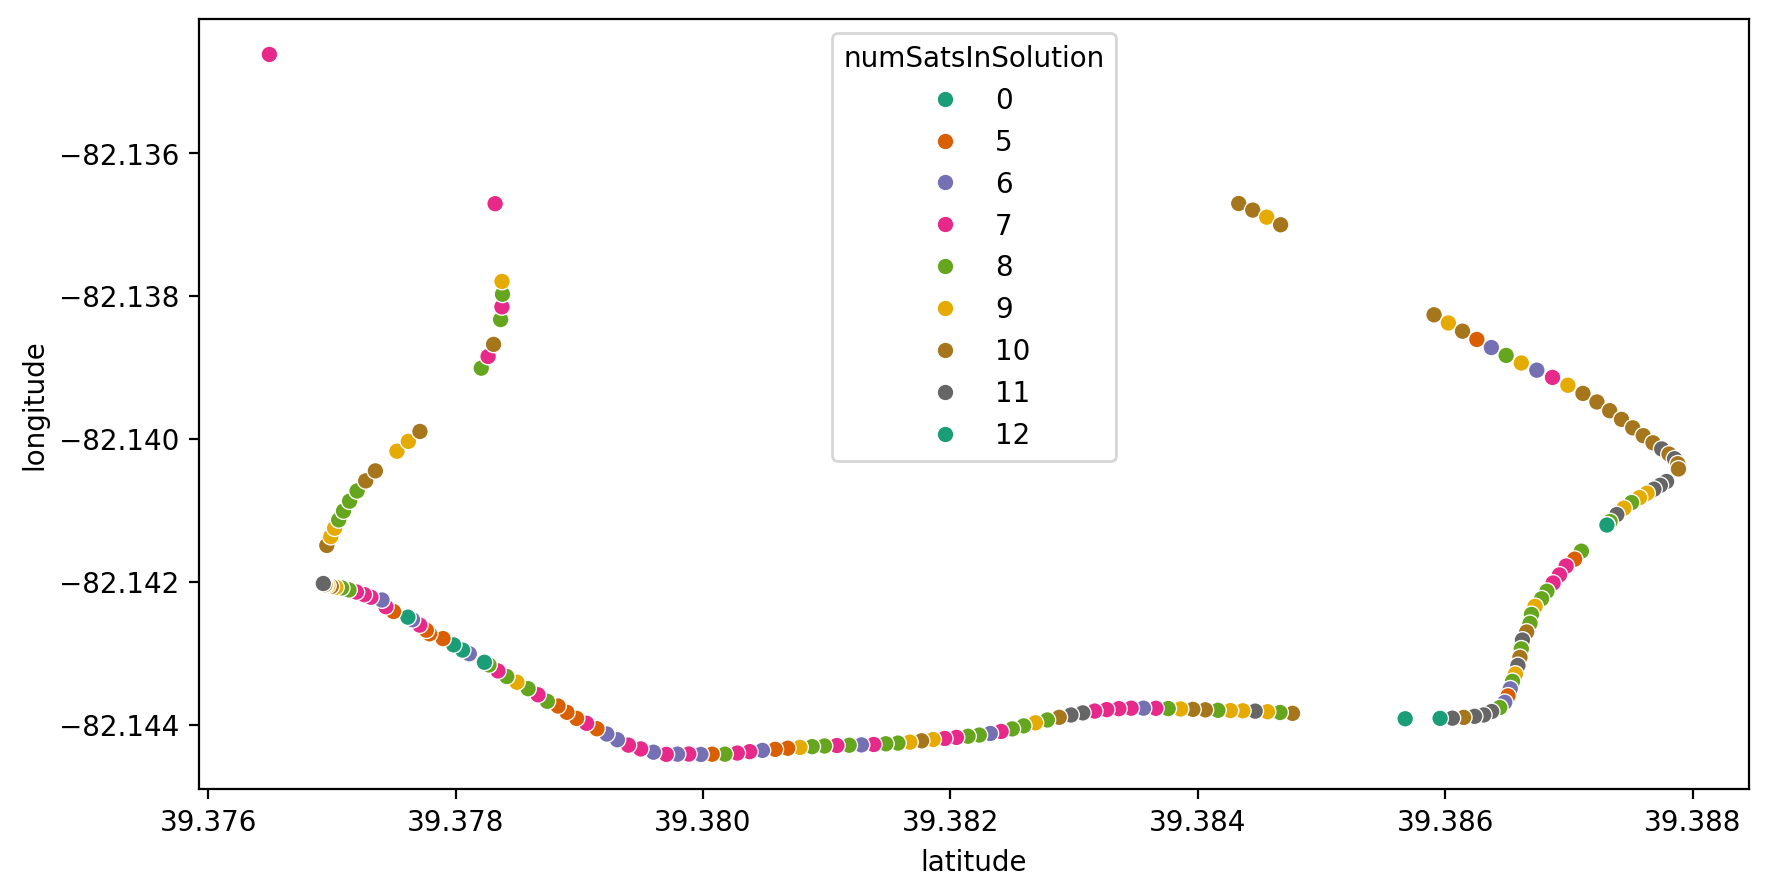

In [33]:
plt.figure(figsize=(10,5), dpi = 200)
sns.scatterplot(x = 'latitude', y = 'longitude', data = c1, hue = 'numSatsInSolution', palette = 'Dark2')

In [34]:
c2= best_pose[labels == 2][["groupMetadataID"] + features]

/tmp/ipykernel_117654/2373729958.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = 'latitude', y = 'longitude', data = c2, hue = 'numSatsInSolution', palette = 'Dark2')


<Axes: >

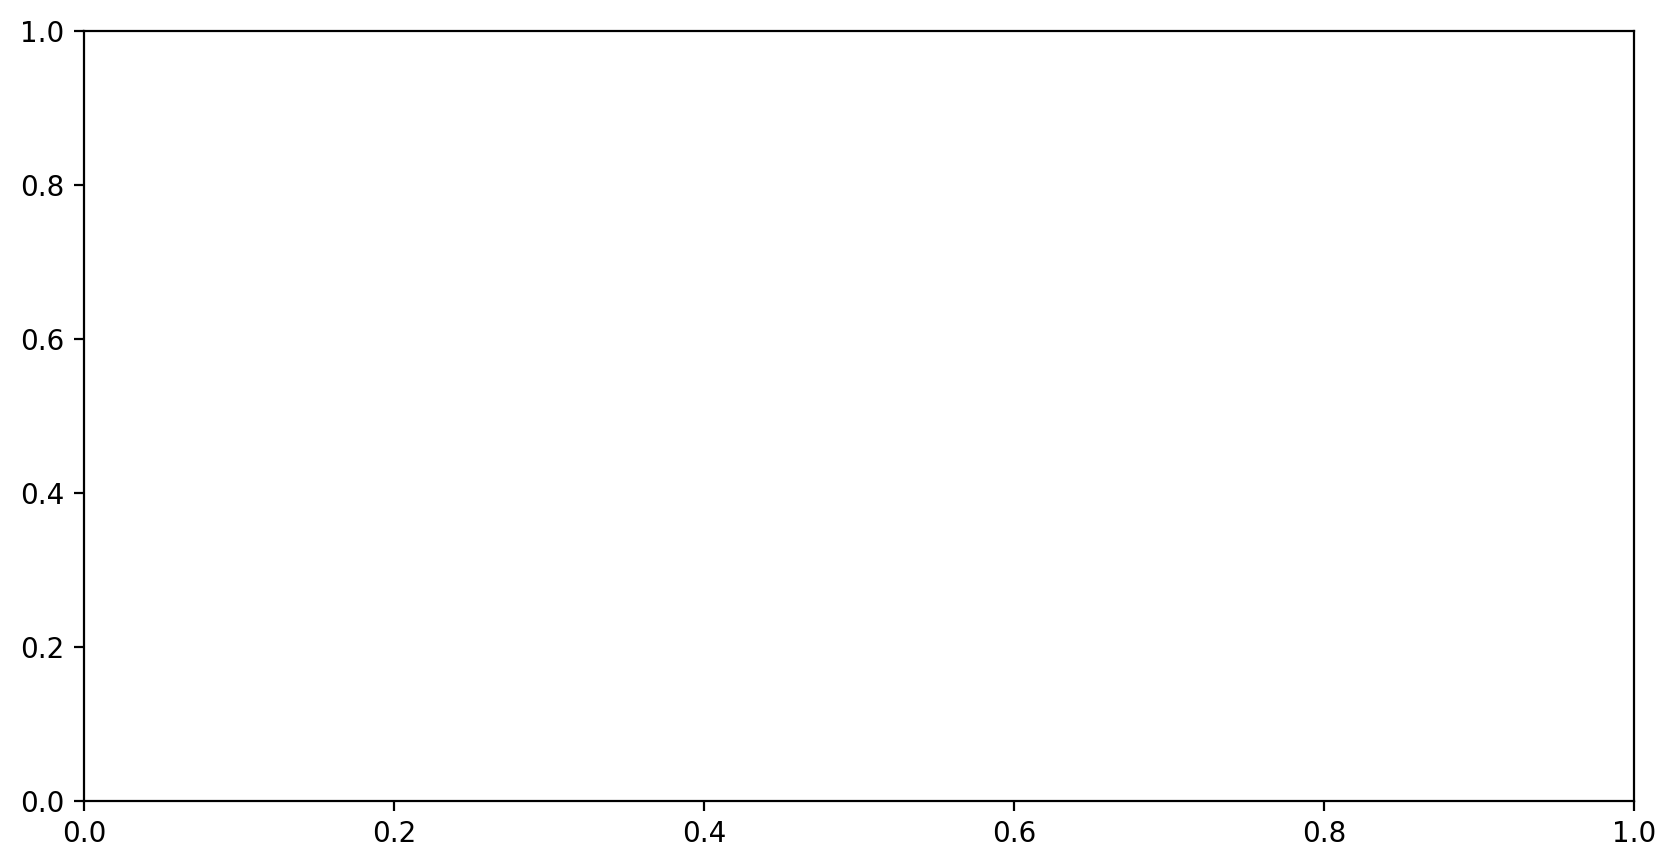

In [35]:
plt.figure(figsize=(10,5), dpi = 200)
sns.scatterplot(x = 'latitude', y = 'longitude', data = c2, hue = 'numSatsInSolution', palette = 'Dark2')

In [36]:
chasis = pd.read_csv("/home/jle_linux/Desktop/TDMprivate/data/0b72a836-f37e-11ee-bb4e-fb353e7798cd/_apollo_canbus_chassis/0b72a836-f37e-11ee-bb4e-fb353e7798cd_apollo_canbus_chassis.csv")

In [37]:
chasis.head()

,brakePercentage,groupMetadataID,drivingMode,speedMps,time,throttlePercentage,steeringPercentage,signal.turnSignal
0,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.92,1707420476851932894,17.4,-73.104800,TURN_RIGHT
1,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.93,1707420476883899750,17.4,-72.664055,TURN_RIGHT
2,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.96,1707420476917887466,17.4,-72.184135,TURN_RIGHT
3,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.99,1707420476950430948,17.4,-71.567090,TURN_RIGHT
4,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,4.02,1707420476983802634,17.4,-71.087166,TURN_RIGHT


In [38]:
best_pose.head()

,heightMsl,groupMetadataID,latitudeStdDev,longitude,solType,extendedSolutionStatus,time,heightStdDev,solStatus,latitude,longitudeStdDev,numSatsInSolution
0,202.979063,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010338,-82.127898,NARROW_INT,33,1693494302079024174,0.021565,SOL_COMPUTED,39.329569,0.008520,14
1,202.976077,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010329,-82.127898,NARROW_INT,33,1693494303047747084,0.021566,SOL_COMPUTED,39.329569,0.008518,14
2,202.976105,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010346,-82.127898,NARROW_INT,33,1693494304060687314,0.021597,SOL_COMPUTED,39.329569,0.008539,14
3,202.978510,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010317,-82.127898,NARROW_INT,33,1693494305053737259,0.021528,SOL_COMPUTED,39.329569,0.008509,14
4,202.979463,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010343,-82.127898,NARROW_INT,33,1693494306051479383,0.021557,SOL_COMPUTED,39.329569,0.008513,14


In [39]:
chasis.head()

,brakePercentage,groupMetadataID,drivingMode,speedMps,time,throttlePercentage,steeringPercentage,signal.turnSignal
0,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.92,1707420476851932894,17.4,-73.104800,TURN_RIGHT
1,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.93,1707420476883899750,17.4,-72.664055,TURN_RIGHT
2,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.96,1707420476917887466,17.4,-72.184135,TURN_RIGHT
3,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.99,1707420476950430948,17.4,-71.567090,TURN_RIGHT
4,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,4.02,1707420476983802634,17.4,-71.087166,TURN_RIGHT


In [40]:
combine.head()

NameError: name 'combine' is not defined

In [ ]:
new = pd.merge(chasis,best_pose, how = 'inner' )

<Axes: >

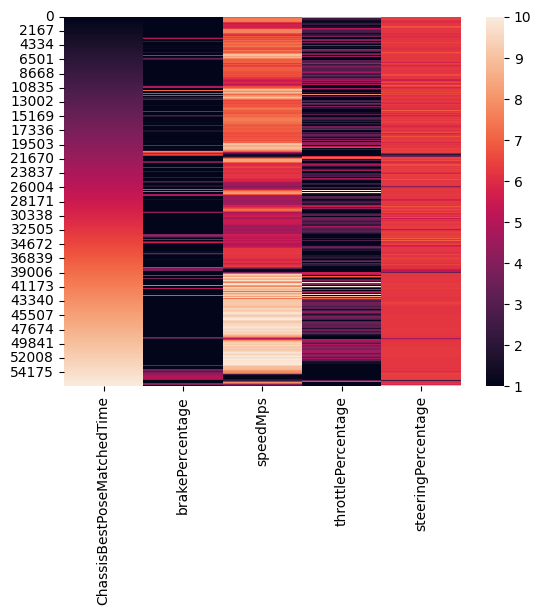

In [77]:
sns.heatmap(data)

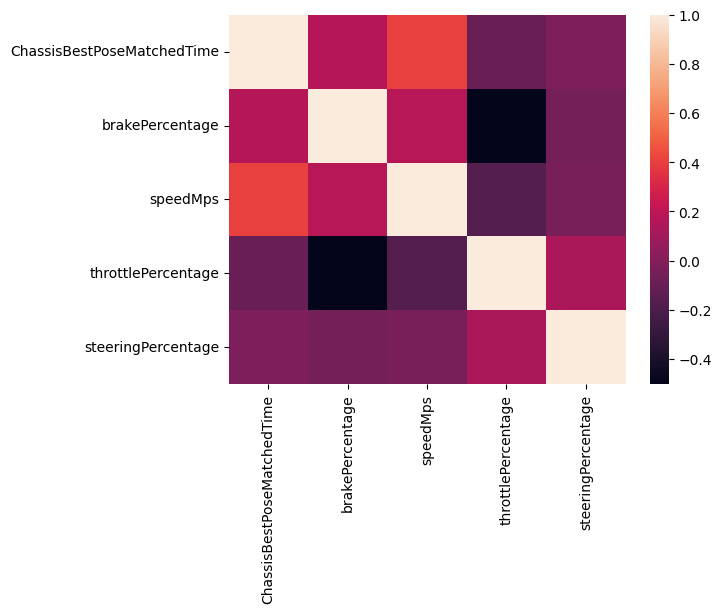

In [79]:
correlation = c0[features].corr(method = 'pearson')
ax = sns.heatmap(correlation)